In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os
import Cooking
import random

# << Point this to the directory containing the raw data >>
RAW_DATA_DIR = 'E:\\new_Mdataset\\'

# << Point this to the desired output directory for the cooked (.h5) data >>
COOKED_DATA_DIR = 'E:\\new_Mdataset\\data_cooked\\'

# The folders to search for data under RAW_DATA_DIR
# For example, the first folder searched will be RAW_DATA_DIR/normal_1
DATA_FOLDERS = ['mission-01-circle-path']

# The size of the figures in this notebook
FIGURE_SIZE = (10,10)

In [6]:
sample_tsv_path = os.path.join(RAW_DATA_DIR, 'E:/new_Mdataset/mission-01-circle-path/ntrain.txt')
sample_tsv = pd.read_csv(sample_tsv_path, sep='|')
sample_tsv.head()

,n,angle,delta_yaw,drone_x,drone_y,drone_yaw,drone_z,img_name,mast_x,mast_y,mast_yaw,mast_z,pole_number,radius,timestamp
0,0,0.0,-15.0,223.150078,388.21494,1.308995,-0.54262,img_pn0_pr1.0_dy-15_da0,223.15008,389.21494,-1.570798,1.45738,0.0,1.0,2019-11-27 11:37:30.746541
1,1,0.0,-12.0,223.150078,388.21494,1.361355,-0.54262,img_pn0_pr1.0_dy-12_da0,223.15008,389.21494,-1.570798,1.45738,0.0,1.0,2019-11-27 11:37:30.746541
2,2,0.0,-9.0,223.150078,388.21494,1.413715,-0.54262,img_pn0_pr1.0_dy-9_da0,223.15008,389.21494,-1.570798,1.45738,0.0,1.0,2019-11-27 11:37:30.746541
3,3,0.0,-6.0,223.150078,388.21494,1.466075,-0.54262,img_pn0_pr1.0_dy-6_da0,223.15008,389.21494,-1.570798,1.45738,0.0,1.0,2019-11-27 11:37:30.746541
4,4,0.0,-3.0,223.150078,388.21494,1.518435,-0.54262,img_pn0_pr1.0_dy-3_da0,223.15008,389.21494,-1.570798,1.45738,0.0,1.0,2019-11-27 11:37:30.746541


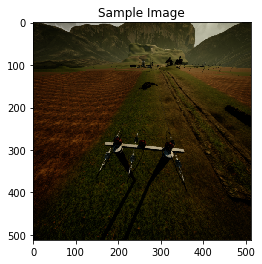

In [7]:
sample_image_path = os.path.join(RAW_DATA_DIR, 'E:/new_Mdataset/mission-01-circle-path/train/img_pn0_pr1.0_dy0_da84.png')
sample_image = Image.open(sample_image_path)
plt.title('Sample Image')
plt.imshow(sample_image)
plt.show()

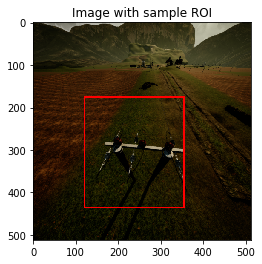

In [4]:
sample_image_roi = sample_image.copy()

fillcolor=(255,0,0)
draw = ImageDraw.Draw(sample_image_roi)
points = [(120,176), (120,435), (355,435), (355,176)]
for i in range(0, len(points), 1):
    draw.line([points[i], points[(i+1)%len(points)]], fill=fillcolor, width=4)
del draw

plt.title('Image with sample ROI')
plt.imshow(sample_image_roi)
plt.show()

In [40]:
full_path_raw_folders = [os.path.join(RAW_DATA_DIR, f) for f in DATA_FOLDERS]

dataframes = []
for folder in full_path_raw_folders:
    current_dataframe = pd.read_csv(os.path.join(folder, 'E:/new_Mdataset/mission-01-circle-path/ntrain.txt'), sep='|')
    current_dataframe['Folder'] = folder
    dataframes.append(current_dataframe)
    
dataset = pd.concat(dataframes, axis=0)

print('Number of data points: {0}'.format(dataset.shape[0]))

dataset.head()

Number of data points: 26570


,n,angle,delta_yaw,drone_x,drone_y,drone_yaw,drone_z,img_name,mast_x,mast_y,mast_yaw,mast_z,pole_number,radius,timestamp,Folder
0,0,0.0,-15.0,223.150078,388.21494,1.308995,-0.54262,img_pn0_pr1.0_dy-15_da0,223.15008,389.21494,-1.570798,1.45738,0.0,1.0,2019-11-27 11:37:30.746541,E:/new_Mdataset/ntrain
1,1,0.0,-12.0,223.150078,388.21494,1.361355,-0.54262,img_pn0_pr1.0_dy-12_da0,223.15008,389.21494,-1.570798,1.45738,0.0,1.0,2019-11-27 11:37:30.746541,E:/new_Mdataset/ntrain
2,2,0.0,-9.0,223.150078,388.21494,1.413715,-0.54262,img_pn0_pr1.0_dy-9_da0,223.15008,389.21494,-1.570798,1.45738,0.0,1.0,2019-11-27 11:37:30.746541,E:/new_Mdataset/ntrain
3,3,0.0,-6.0,223.150078,388.21494,1.466075,-0.54262,img_pn0_pr1.0_dy-6_da0,223.15008,389.21494,-1.570798,1.45738,0.0,1.0,2019-11-27 11:37:30.746541,E:/new_Mdataset/ntrain
4,4,0.0,-3.0,223.150078,388.21494,1.518435,-0.54262,img_pn0_pr1.0_dy-3_da0,223.15008,389.21494,-1.570798,1.45738,0.0,1.0,2019-11-27 11:37:30.746541,E:/new_Mdataset/ntrain


100     0.0
101     0.0
102     0.0
103     0.0
104     0.0
105     0.0
106     0.0
107     0.0
108     0.0
109     0.0
110     0.0
111     0.0
112     0.0
113     0.0
114     0.0
115     0.0
116     0.0
117     0.0
118     0.0
119     0.0
120     0.0
121     3.0
122     3.0
123     3.0
124     3.0
125     3.0
126     3.0
127     3.0
128     3.0
129     3.0
       ... 
870    21.0
871    21.0
872    21.0
873    21.0
874    21.0
875    21.0
876    21.0
877    21.0
878    21.0
879    21.0
880    21.0
881    21.0
882    21.0
883    21.0
884    21.0
885    21.0
886    21.0
887    21.0
888    21.0
889    21.0
890    21.0
891    21.0
892    21.0
893    21.0
894    21.0
895    21.0
896    21.0
897    21.0
898    21.0
899    21.0
Name: angle, Length: 800, dtype: float64


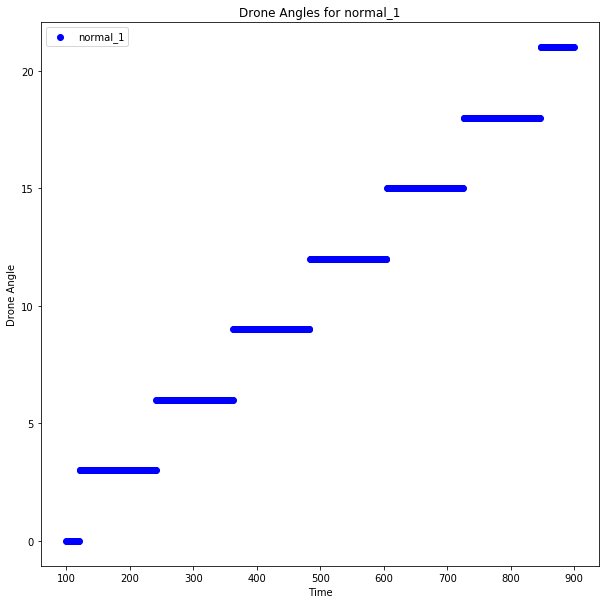

In [41]:
min_index = 100
max_index = 900

steering_angles_normal_1 = dataset[dataset['Folder'].apply(lambda v: 'ntrain' in v)]['angle'][min_index:max_index]
#steering_angles_swerve_1 = dataset[dataset['Folder'].apply(lambda v: 'E:/new_Mdataset/mission-01-circle-path/ntrain' in v)]['delta_yaw'][min_index:max_index]

plot_index = [i for i in range(min_index, max_index,1)]
FIGURE_SIZE = (10,10)
fig = plt.figure(figsize=FIGURE_SIZE)
ax1 = fig.add_subplot(111)

print(steering_angles_normal_1)
ax1.scatter(plot_index, steering_angles_normal_1, c='b', marker='o', label='normal_1')
#ax1.scatter(plot_index, steering_angles_swerve_1, c='r', marker='o', label='swerve_1')
plt.legend(loc='upper left');
plt.title('Drone Angles for normal_1')
plt.xlabel('Time')
plt.ylabel('Drone Angle')
plt.show()

In [7]:
steering_angles_normal_1 = dataset[dataset['Folder'].apply(lambda v: 'train' in v)]['angle'][min_index:max_index]
print(steering_angles_normal_1)

Series([], Name: angle, dtype: float64)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


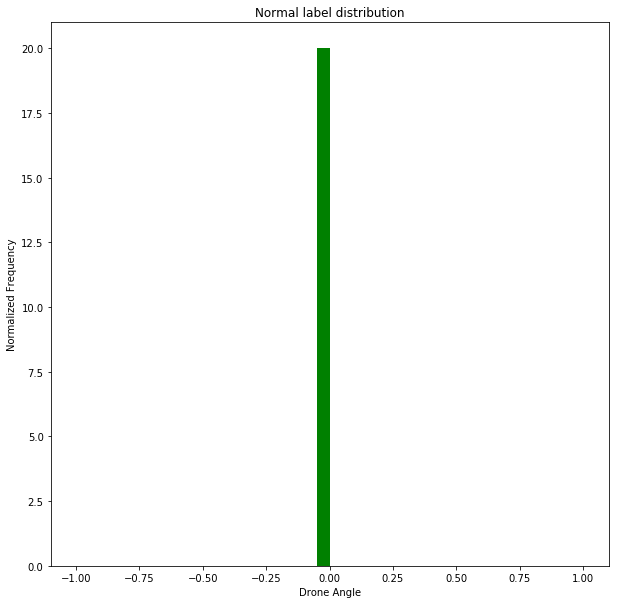

In [8]:
bins = np.arange(-1, 1.05, 0.05)
normal_labels = dataset[dataset['n'] == False]['angle']
#swerve_labels = dataset[dataset['Is Swerve'] == True]['Steering']

def steering_histogram(hist_labels, title, color):
    plt.figure(figsize=FIGURE_SIZE)
    n, b, p = plt.hist(hist_labels.as_matrix(), bins, normed=1, facecolor=color)
    plt.xlabel('Drone Angle')
    plt.ylabel('Normalized Frequency')
    plt.title(title)
    plt.show()

steering_histogram(normal_labels, 'Normal label distribution', 'g')
#steering_histogram(swerve_labels, 'Swerve label distribution', 'r')

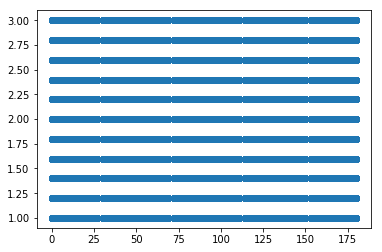

In [5]:
import matplotlib.pyplot as plt
import numpy as np

w = 4
h = 3
d = 70
FIGURE_SIZE = (10,10)
idata = np.genfromtxt(
    'E:/new_Mdataset/mission-01-circle-path/ntrain.txt', names=True,
    dtype="float", delimiter="|")

plt.plot(idata["angle"], idata["radius"], "o")

In [2]:
train_eval_test_split = [0.7, 0.2, 0.1]
full_path_raw_folders =  [os.path.join(RAW_DATA_DIR, f) for f in DATA_FOLDERS]
Cooking.cook(full_path_raw_folders, COOKED_DATA_DIR, train_eval_test_split)

Reading data from E:\new_Mdataset\mission-01-circle-path...
Processing E:\new_Mdataset\data_cooked\train.h5...
Finished saving E:\new_Mdataset\data_cooked\train.h5.
Processing E:\new_Mdataset\data_cooked\eval.h5...
Finished saving E:\new_Mdataset\data_cooked\eval.h5.
Processing E:\new_Mdataset\data_cooked\test.h5...
Finished saving E:\new_Mdataset\data_cooked\test.h5.
